<h1><center> Process Notebook</center></h1>

### Data preprocessing

The data used in this project was obtained from Kaggle, specifically from the "Melbourne Airbnb Open Data" dataset. The dataset was scraped from the Airbnb website and contains information on short stay houses listed in Melbourne, including features such as location, property type, number of bedrooms and bathrooms, reveiws and rental price. 

In terms of issues faced in collecting the data, we should always be aware of potential issues such as missing or duplicate data, outliers, or inconsistencies in the dataset. It's always a good idea to perform some exploratory data analysis (EDA) to gain a better understanding of the data before using it for machine learning models or other analyses.

At first, you can see the dataset with the columns that we need probably.

In [57]:
#import libraries
import pandas as pd
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sb
import csv
import math

#Make this the path to the data
DATA_PATH = "/content/"

# TODO Load data files here...
def loaddatafile(fname):
  df = pd.read_csv(fname, dtype=str, header=0)
  return df


melbourne = loaddatafile(DATA_PATH + "cleansed_listings_dec18.csv")

#show the number of rows and columns of dataset
print('number of rows and columns of dataset:')
print(melbourne.shape)

# keep the columns that we need probably
remove_columns = ['listing_url', 'scrape_id', 'host_response_rate', 'country_code', 'host_picture_url', 'notes', 'last_scraped', 'name', 'summary', 'space', 'description', 'neighborhood_overview',
                  'transit', 'access', 'interaction', 'house_rules', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
                  'host_response_time', 'host_is_superhost', 'host_thumbnail_url', 'host_neighborhood', 'host_verifications', 'host_has_profile_pic',
                  'street', 'suburb', 'state', 'zipcode', 'smart_location', 'country', 'is_location_exact', 'bed_type', 'guests_included', 'extra_people',
                  'calendar_updated', 'has_availability', 'availability_30','availability_60', 'availability_90', 'calendar_last_scraped', 'first_review','last_review',
                  'requires_license', 'license', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification',
                  'calculated_host_listings_count']


# Remove the columns
melbourne = melbourne.drop(columns=remove_columns)

melbourne.info()

number of rows and columns of dataset:
(22895, 84)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22895 entries, 0 to 22894
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           22895 non-null  object
 1   host_id                      22895 non-null  object
 2   host_identity_verified       22892 non-null  object
 3   neighborhood                 22895 non-null  object
 4   city                         22895 non-null  object
 5   latitude                     22895 non-null  object
 6   longitude                    22895 non-null  object
 7   property_type                22895 non-null  object
 8   room_type                    22895 non-null  object
 9   accommodates                 22895 non-null  object
 10  bathrooms                    22878 non-null  object
 11  bedrooms                     22890 non-null  object
 12  beds                         22861 no

**Consistant columns**

We need consistancy in the columns.
First, we convert numeral columns from object to the number.



In [58]:
#a list of numerical columns
numeral_column = ['id', 'host_id', 'latitude', 'longitude','accommodates','bathrooms', 'bedrooms','beds', 'price','weekly_price', 'monthly_price','security_deposit', 'cleaning_fee', 'minimum_nights', 'maximum_nights', 'availability_365','number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                  'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']

# convert numeral columns from object to the number (because we need this consistant for getting summary and plot histogram)
for i in numeral_column:
  melbourne[i] = melbourne[i].apply(pd.to_numeric)


**duplicated columns**

For the first step, we check for the duplicated columns and if they have the same data, drop it.

In [59]:
#loop through the columns in melbourne dataset
for column in melbourne.columns:
  for column2 in melbourne.columns:
    if column != column2:
      #check that 2 columns are the same or not
      if sum(melbourne[column] != melbourne[column2]) == 0:
        print(column,"column in the dataset was identical to the", column2, "column, so we need to eliminate one of these columns from the dataset.")

neighborhood column in the dataset was identical to the city column, so we need to eliminate one of these columns from the dataset.
city column in the dataset was identical to the neighborhood column, so we need to eliminate one of these columns from the dataset.


Based on the above result, we removed the neighborhood column which it is the same ad city column.

In [60]:
#remove 'neighborhood' from column that we want to keep
melbourne = melbourne.drop(columns= 'neighborhood')

**Remove cheat columns**


We also should to remove 'weekly_price', 'monthly_price', 'cleaning_fee' and 'security_deposit' columns, because they are related to the price and have information about rental price that we want to predict.

In [61]:
#remove 'weekely_price', 'monthly_price', 'cleaning_fee' and 'security_deposit' from column that we want to keep
related_price = ["weekly_price", "monthly_price", "cleaning_fee", "security_deposit"]
melbourne = melbourne.drop(columns= related_price)

**Filling missed values**

Some columns like 'host_identity_verified', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', and 'reviews_per_month' does not have data for all rows. 



In [35]:
for column in melbourne.columns:
  # Count the number of missing values in the 'mycolumn' column
  num_missing = melbourne[column].isnull().sum()
  print(f'The number of missing values in the {column} is: {num_missing}')


The number of missing values in the id is: 0
The number of missing values in the host_id is: 0
The number of missing values in the host_identity_verified is: 3
The number of missing values in the city is: 0
The number of missing values in the latitude is: 0
The number of missing values in the longitude is: 0
The number of missing values in the property_type is: 0
The number of missing values in the room_type is: 0
The number of missing values in the accommodates is: 0
The number of missing values in the bathrooms is: 17
The number of missing values in the bedrooms is: 5
The number of missing values in the beds is: 34
The number of missing values in the amenities is: 0
The number of missing values in the price is: 0
The number of missing values in the minimum_nights is: 0
The number of missing values in the maximum_nights is: 0
The number of missing values in the availability_365 is: 0
The number of missing values in the number_of_reviews is: 0
The number of missing values in the review

Based on our preliminary analysis, some features like 'bathrooms', 'bedrooms', and 'beds' are very important to estimate the rental price. For many few samples in our dataset, we do not have information for these features to train the model with the reliable samples. So we remove those samples that are not too much.


In [62]:
# Remove rows that do not have a value in important features
melbourne = melbourne.dropna(subset=["beds"])
melbourne = melbourne.dropna(subset=["bedrooms"])
melbourne = melbourne.dropna(subset=["bathrooms"])
melbourne = melbourne.dropna(subset=["host_identity_verified"])

For other columns, including review columns, we impute these features with the mean value.

In [37]:
review_column = ['number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']

# get summary statistics for numeric columns
summaries = []
summaries = melbourne[review_column].agg(['min', 'max', 'mean', 'std'])

print(summaries)

      number_of_reviews  review_scores_rating  review_scores_accuracy  \
min            0.000000             20.000000                2.000000   
max          538.000000            100.000000               10.000000   
mean          21.305709             94.183857                9.634435   
std           39.046502              8.562710                0.840829   

      review_scores_cleanliness  review_scores_checkin  \
min                    2.000000               2.000000   
max                   10.000000              10.000000   
mean                   9.425425               9.718894   
std                    0.999142               0.770184   

      review_scores_communication  review_scores_location  \
min                      2.000000                2.000000   
max                     10.000000               10.000000   
mean                     9.750452                9.714011   
std                      0.762487                0.697944   

      review_scores_value  reviews_pe

In [63]:
# convert numeral columns from object to the number
for i in review_column:
  melbourne[i] = melbourne[i].apply(pd.to_numeric)
# Calculate the mean of the column with missing values and fill missing values in the column with the mean
for j in review_column:
  melbourne[j].fillna(melbourne[j].mean(), inplace=True)

melbourne.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22842 entries, 0 to 22894
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           22842 non-null  int64  
 1   host_id                      22842 non-null  int64  
 2   host_identity_verified       22842 non-null  object 
 3   city                         22842 non-null  object 
 4   latitude                     22842 non-null  float64
 5   longitude                    22842 non-null  float64
 6   property_type                22842 non-null  object 
 7   room_type                    22842 non-null  object 
 8   accommodates                 22842 non-null  int64  
 9   bathrooms                    22842 non-null  float64
 10  bedrooms                     22842 non-null  float64
 11  beds                         22842 non-null  float64
 12  amenities                    22842 non-null  object 
 13  price           

**Outliers values**

We want to explore for outlier values in dataset. For this purpose we use histogram.

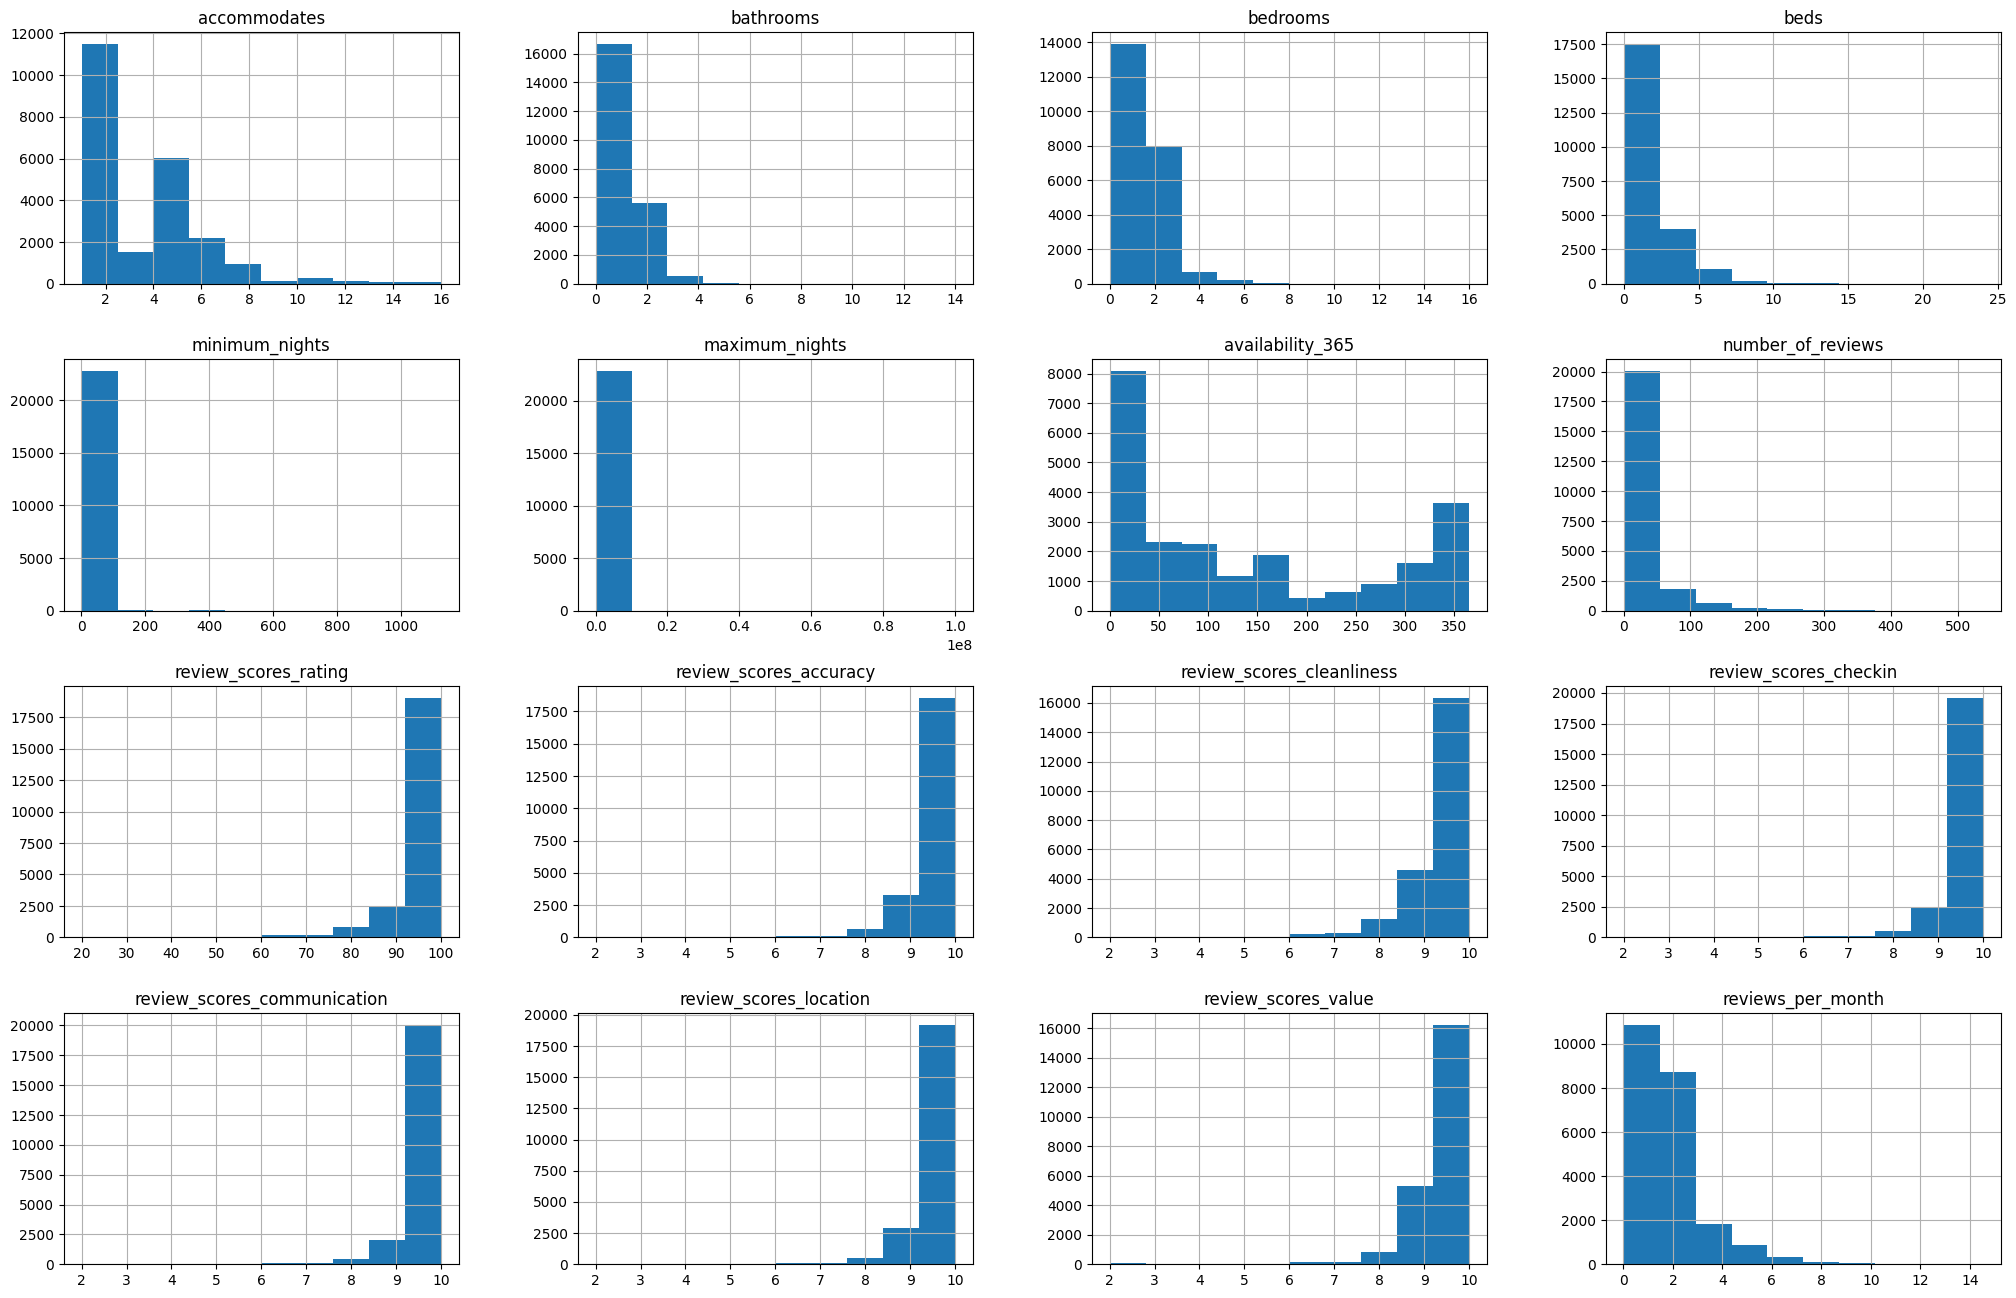

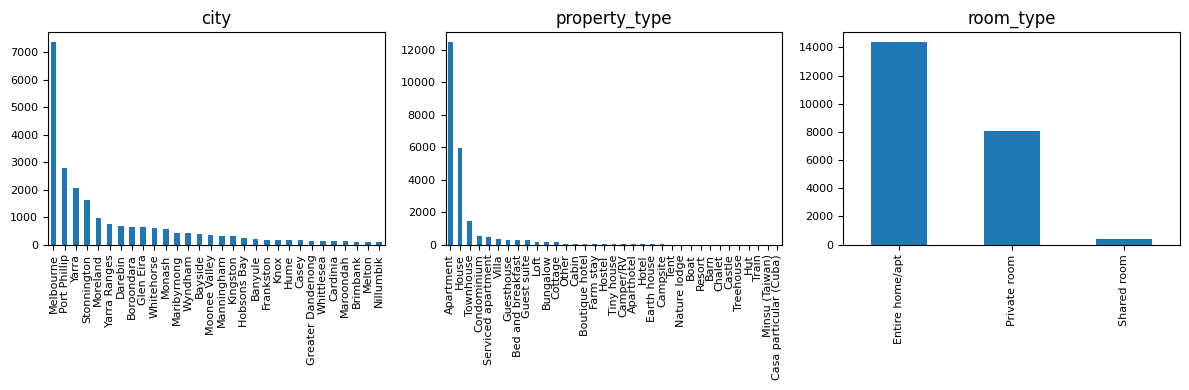

In [39]:
# Define the features to plot
numeral_column = ['accommodates','bathrooms', 'bedrooms','beds', 'minimum_nights', 'maximum_nights', 'availability_365','number_of_reviews', 'review_scores_rating', 
                  'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin', 'review_scores_communication', 
                  'review_scores_location', 'review_scores_value', 'reviews_per_month']
categorical_columns = ['city', 'property_type', 'room_type', "amenities"]                  

#create a grid of histograms for some columns like 'accommodates', 'bathrooms', 'bedrooms', ... (numerical columns)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(25, 16))
melbourne[numeral_column].hist(ax=axes)
plt.show()

# create a plot for city, property type, and room type
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

for i, ax in enumerate(axes):
    melbourne[categorical_columns[i]].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(categorical_columns[i])
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    
plt.tight_layout()
plt.show()


By looking at histogram of different features, we can see that there is some outliers values in property_type, bathrooms, minimum nights, maximum nights and price.

So we also check what proportion of these columns have the outlier values. If they are very less, we can exclude them from our analysis.

We check for samples with more than 10 bathrooms, for the minimum nights greater than 2 years, and for the maximum nights greater than 10000 nights.

In [64]:
print("proportion of bathroom column:", len(melbourne[melbourne['bathrooms']>=10])/len(melbourne)*100)
print("proportion of minimum nights column:", len(melbourne[melbourne['minimum_nights']>=730])/len(melbourne)*100)
print("proportion of maximum nights column:", len(melbourne[melbourne['maximum_nights']>=10000])/len(melbourne)*100)

proportion of bathroom column: 0.00875580071797566
proportion of minimum nights column: 0.043779003589878296
proportion of maximum nights column: 0.039401103230890466


As these proportion is low, we exclude the outlier samples.

In [65]:
melbourne = melbourne[melbourne['bathrooms']<10]
melbourne = melbourne[melbourne['minimum_nights']<730]
melbourne = melbourne[melbourne['maximum_nights']<10000]

melbourne.shape

(22821, 26)

 Then, we check 'price' columns for outlier samples.

In [42]:
melbourne['price'] = melbourne['price'].apply(pd.to_numeric)
price_summary = melbourne['price'].agg(['min', 'max', 'mean', 'std'])

print(price_summary)

min         0.000000
max     12624.000000
mean      147.822532
std       210.671044
Name: price, dtype: float64


First, we want to remove outlier values for 'price' column.

<Axes: >

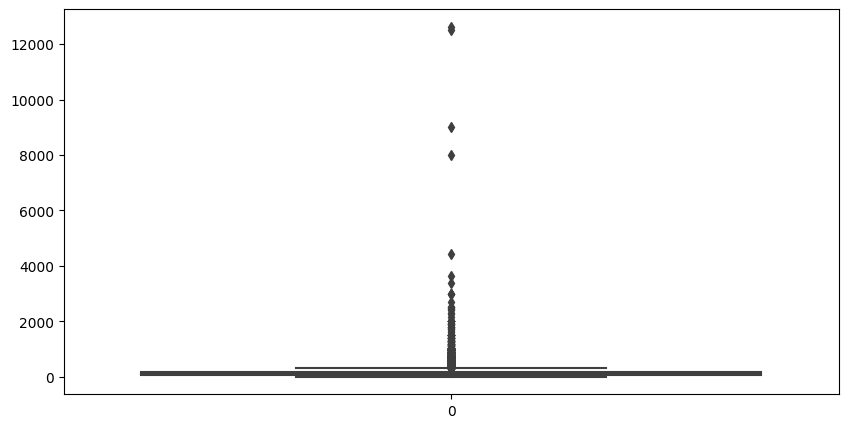

In [66]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(melbourne['price'])

Let's check what proportion of dataset have price per night less than 10. 

In [67]:
print("proportion of dataset have price per night less than 10:", len(melbourne[melbourne['price']<=10])/len(melbourne)*100)

proportion of dataset have price per night less than 10: 0.09640243635248236


We can see these are very less and can be excluded from our analysis.

In [68]:
# excluding the observation having 0 price
melbourne = melbourne[melbourne['price'] >= 10]

melbourne.shape

(22799, 26)

Then we check the destribution of prices to each room types.

<Axes: xlabel='room_type', ylabel='price'>

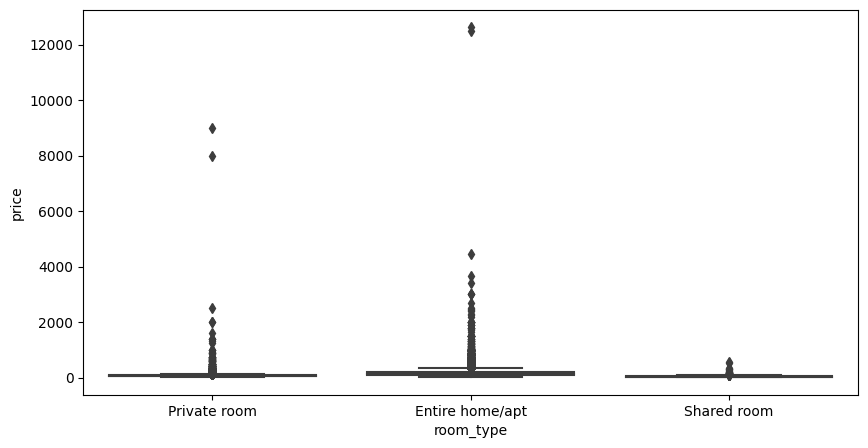

In [46]:
plt.figure(figsize=(10,5))
sns.boxplot(data=melbourne, x='room_type', y='price')

We can see there are 2 or 3 private rooms have unsual price and 1 Entire room/apt which has been priced pretty high. So we check these unusual values.

In [69]:
melbourne[melbourne['room_type']== "Private room"][melbourne['price']>4000]

<ipython-input-69-86e1802167d6>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  melbourne[melbourne['room_type']== "Private room"][melbourne['price']>4000]


,id,host_id,host_identity_verified,city,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
7872,16181637,105660264,f,Boroondara,-37.78566,145.062014,Townhouse,Private room,2,1.0,...,0,1,94.183857,9.634435,9.425425,9.718894,9.750452,9.714011,9.478066,0.110000
8119,16359110,107127376,f,Melbourne,-37.80644,144.962038,Apartment,Private room,2,1.5,...,365,0,94.183857,9.634435,9.425425,9.718894,9.750452,9.714011,9.478066,1.591457


The first one is a town house and the second one is an Apartmant. 

 We can further check with the average price comparison for these 2 cities.

<Axes: xlabel='city'>

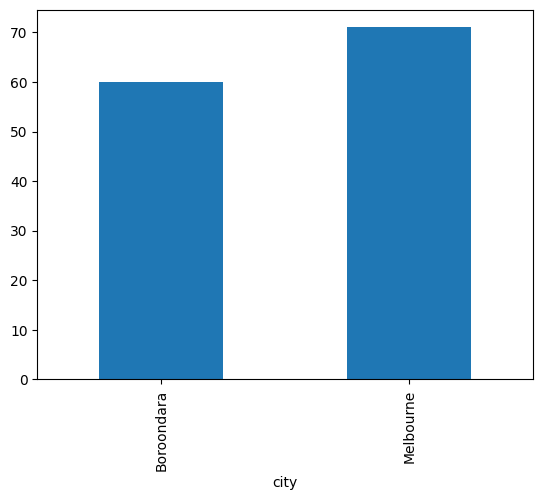

In [48]:
melbourne[melbourne['room_type']=="Private room"].groupby(['city'])['price'].median().loc[['Boroondara','Melbourne']].plot(kind='bar')


We can see that there is a drastic difference in the prices for these samples. These can be due to the facilities provided by the host or in the room that makes it different from the others. For our analysis purpose it will better to drop them as with this csv we are not able to extract any other information regarding these listings. Same is the case for the entire apartment.

In [70]:
# checking for entire apartment
melbourne[melbourne['room_type']=="Entire home/apt"][melbourne['price']>8000]

<ipython-input-70-eaf197438838>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  melbourne[melbourne['room_type']=="Entire home/apt"][melbourne['price']>8000]


,id,host_id,host_identity_verified,city,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
5636,12719024,69151339,t,Darebin,-37.724889,144.997307,House,Entire home/apt,4,1.0,...,0,1,94.183857,9.634435,9.425425,9.718894,9.750452,9.714011,9.478066,0.03
19536,28112069,63446660,f,Casey,-38.052419,145.348927,House,Entire home/apt,4,3.0,...,177,1,94.183857,9.634435,9.425425,9.718894,9.750452,9.714011,9.478066,0.30


<Axes: xlabel='city'>

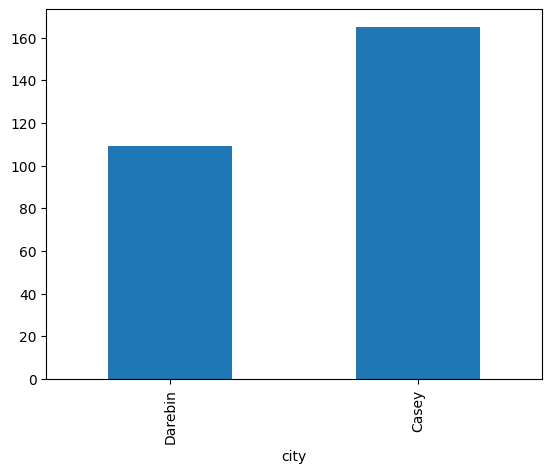

In [24]:
melbourne[melbourne['room_type']=="Entire home/apt"].groupby(['city'])['price'].median().loc[['Darebin','Casey']].plot(kind='bar')

So, we exclude the price greater than 6000:

In [71]:
melbourne = melbourne[melbourne['price']<=6000]

melbourne.shape

(22795, 26)

And to remove the outliers for "property_type column, we consider the property_type under 40 as 'Other'.

In [72]:
# find the frequency of each value in the 'property_type' column
counts = melbourne['property_type'].value_counts()

# replace less frequent values with 'other'
threshold = 40 # set the threshold value
less_frequent = counts[counts < threshold].index.tolist()
melbourne['property_type'].replace(less_frequent, 'Other', inplace=True)

# find the frequency of each value in the 'property type' column
frequency = melbourne['property_type'].value_counts()
print(frequency)

Apartment             12428
House                  5935
Townhouse              1432
Condominium             542
Serviced apartment      492
Villa                   325
Guesthouse              276
Bed and breakfast       260
Guest suite             258
Other                   216
Loft                    191
Bungalow                157
Cottage                 150
Cabin                    46
Boutique hotel           44
Farm stay                43
Name: property_type, dtype: int64


**Categorical features**

Some features like, Host verified, Room type, property type  are categorical features that have different finite values. To pass these features to the model at first we need to do some steps to prepare data. We used two techniques, **label encoding** and **one hot encoding** to convert the string value to the number. Then we compared the mean squared error (MSE) calculated for two different encoding techniques, and so we find that label encoding was a more suitable technique for preparing the features for input in machine learning. Therefore, the approach was continued with label encoding.

In [73]:
from sklearn.preprocessing import LabelEncoder

finite_category = ['room_type', 'property_type', 'host_identity_verified', 'city']

# create an empty dictionary to store the mappings
label_mapping = {}

# loop through each column and apply LabelEncoder
for col in finite_category:
    if melbourne[col].dtype == 'object':
        # instantiate LabelEncoder object
        le = LabelEncoder()
        # fit and transform the data
        melbourne[col] = le.fit_transform(melbourne[col])
        # the mapping between original labels and integer codes
        label_mapping[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# print the mapping between original labels and integer codes for each column
for col, mapping in label_mapping.items():
    print(f"Label Encoding Classes for {col}:\n", mapping)


Label Encoding Classes for room_type:
 {'Entire home/apt': 0, 'Private room': 1, 'Shared room': 2}
Label Encoding Classes for property_type:
 {'Apartment': 0, 'Bed and breakfast': 1, 'Boutique hotel': 2, 'Bungalow': 3, 'Cabin': 4, 'Condominium': 5, 'Cottage': 6, 'Farm stay': 7, 'Guest suite': 8, 'Guesthouse': 9, 'House': 10, 'Loft': 11, 'Other': 12, 'Serviced apartment': 13, 'Townhouse': 14, 'Villa': 15}
Label Encoding Classes for host_identity_verified:
 {'f': 0, 't': 1}
Label Encoding Classes for city:
 {'Banyule': 0, 'Bayside': 1, 'Boroondara': 2, 'Brimbank': 3, 'Cardinia': 4, 'Casey': 5, 'Darebin': 6, 'Frankston': 7, 'Glen Eira': 8, 'Greater Dandenong': 9, 'Hobsons Bay': 10, 'Hume': 11, 'Kingston': 12, 'Knox': 13, 'Manningham': 14, 'Maribyrnong': 15, 'Maroondah': 16, 'Melbourne': 17, 'Melton': 18, 'Monash': 19, 'Moonee Valley': 20, 'Moreland': 21, 'Nillumbik': 22, 'Port Phillip': 23, 'Stonnington': 24, 'Whitehorse': 25, 'Whittlesea': 26, 'Wyndham': 27, 'Yarra': 28, 'Yarra Ranges': 

The other categorial data that we are concerend about it is amenities column.
To prepare the amenities column in a Melbourne rental house price, we should follow these steps:

first converts the amenities column to lowercase and removes braces, quotes, parentheses, and colons. Then, it splits the amenities column into individual values using regular expressions and creates a list of values for each row. Finally, it creates separate columns for each individual amenity, with a Boolean value indicating whether that amenity is present in that row's list of amenities.

In [ ]:
import re
import numpy as np
# Convert amenities column to string type
melbourne['amenities'] = melbourne['amenities'].astype(str)
melbourne['amenities'] = melbourne['amenities'].str.replace('[{}]', '')  # Remove braces and quotes
melbourne['amenities'] = melbourne['amenities'].str.replace('\(', '')  # Remove left parentheses
melbourne['amenities'] = melbourne['amenities'].str.replace('\)', '')  # Remove right parentheses
melbourne['amenities'] = melbourne['amenities'].str.lower()  # Convert to lowercase
melbourne['amenities'] = melbourne['amenities'].str.replace('(\w+)\s*\:', '\g<1>')  # Remove colons after words

# Split amenities into individual values
amenities_values = []
for row in melbourne['amenities']:
    if row == 'nan':
        values = []
    else:
        # Split the string only where there are no quotes around the substring
        values = re.findall('\".+?\"|\w+', row)
    amenities_values.append(values)

# Create columns for individual amenities
all_amenities = set([amenity for amenities in amenities_values for amenity in amenities])
for amenity in all_amenities:
    melbourne[amenity] = [amenity in row if row != [] else False for row in amenities_values]

# Count number of listings with each amenity
amenity_counts = melbourne[all_amenities].sum().sort_values(ascending=False)

# Drop the original "amenities" column
melbourne = melbourne.drop('amenities', axis=1)

Now we need to map amenities values to number to have feature input for Machine Learning.

In [75]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Loop through each amenities column
for amenity in all_amenities:
    # Fit the encoder to the unique values in the column
    encoder.fit(melbourne[amenity].unique())
    
    # Transform the boolean values to 0 and 1
    melbourne[amenity] = encoder.transform(melbourne[amenity])


Now, we have a cleaned data and we can go to the Feature selection step. 

### Feature selection

The following heat map figure shows how features are corellated to each other. As you see, some features are highly dependent on each other.

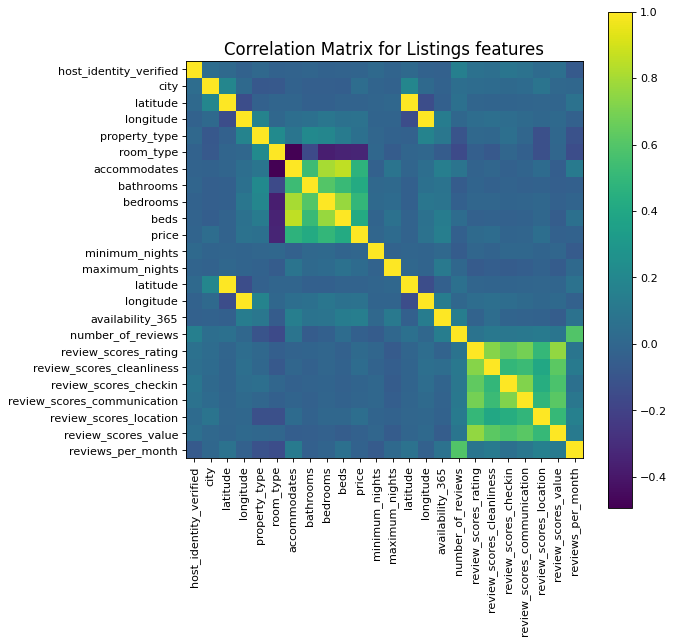

In [76]:
picked_column = ['host_identity_verified','city', 'latitude','longitude', 'property_type', 'room_type', 'accommodates', 
             'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'latitude', 'longitude',
             'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
             'review_scores_location', 'review_scores_value', 'reviews_per_month'
                 ] 
melbourne_cor = melbourne[picked_column]

# plot heatmap
corr = melbourne_cor.corr()
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title('Correlation Matrix for Listings features', fontsize=15)
plt.show()



Based on heat map, some features like beds, bedrooms, bathrooms, accommodates, availability_365 have more correlation with price.

We also check permutation test to find out which features are more important. You can see top 10 features.

In [77]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance

# melbourne = melbourne.drop('id', axis=1)

# the dataset is stored in a variable called 'melbourne'
X = melbourne.drop('price', axis=1)  # Predictor variables
y = melbourne['price']  # Response variable

# Define a linear regression model
model = LinearRegression()

# Fit the model on your training data
model.fit(X, y)

# Use permutation importance to determine feature importance
# Set the number of iterations for the permutation test
n_permutations = 50
# Set the scoring metric (R-squared in this example)
scoring = 'r2'
# Perform permutation importance
result = permutation_importance(model, X, y, n_repeats=n_permutations, scoring=scoring, random_state=42)

# Get the top 10 most important features
importances = result.importances_mean
indices = importances.argsort()[-10:][::-1]
top_10_features = X.columns[indices]

# Print the feature importance scores
print(top_10_features)

Index(['bedrooms', 'bathrooms', 'room_type', 'accommodates',
       'availability_365', 'pool', '"indoor fireplace"', 'number_of_reviews',
       'dryer', 'review_scores_value'],
      dtype='object')


#Model training

We applied several regression models on our dataset. These models are included linear regression, Support Vector Machines, decision tree, random forest and multi layer perception regression. Each model is trained on 80% of the data and tested on the remaining 20%, and their performance is evaluated using metrics such as Mean Squared Error (MSE) and Cross Validation Mean Squared Error (CV).

First, we check that how many samples and features we have.

In [78]:
# Printing the number of samples and features for the dataset
n_samples, n_features = melbourne.shape
print('Number of samples = ', n_samples)
print('Number of features = ', n_features)

Number of samples =  22795
Number of features =  212


**Linear regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# the dataset is stored in a variable called 'melbourne'
X = melbourne.drop('price', axis=1)  # Predictor variables
y = melbourne['price']  # Response variable

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression object
reg_li = LinearRegression()

# Fit the model using the training data
reg_li.fit(X_train, y_train)

# Predict on the test set
y_pred_linear_regression = reg_li.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred_linear_regression)

print("Mean Squared Error:", mse)

# Apply 5-fold cross validation
cv_mse = cross_val_score(reg_li, X, y, cv=5, scoring='neg_mean_squared_error')

print("Cross Validation Mean Squared Error:", abs(cv_mse.mean()))

Mean Squared Error: 15607.2824856213
Cross Validation Mean Squared Error: 16191.22115607844


**Decision trees**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a decision tree regression model
dt = DecisionTreeRegressor(max_depth=10, random_state=42)
dt.fit(X_train_scaled, y_train)

# Predict the test set
y_pred_decisiontree = dt.predict(X_test_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred_decisiontree)

print("Mean Squared Error:", mse)

# Apply 5-fold cross validation
cv_mse_dt = cross_val_score(dt, X, y, cv=5, scoring='neg_mean_squared_error')

print("Cross Validation Mean Squared Error:", abs(cv_mse_dt.mean()))

Mean Squared Error: 19500.344729334076
Cross Validation Mean Squared Error: 25510.899968254187


**Random forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a random forest regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict the test set
y_pred_randomforest = rf.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred_randomforest)

print("Mean Squared Error:", mse)

# Apply 5-fold cross validation
cv_mse_rf = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')

print("Cross Validation Mean Squared Error:", abs(cv_mse_rf.mean()))

Mean Squared Error: 11493.132238844177
Cross Validation Mean Squared Error: 14551.281892635026


**Support Vector Machines (SVMs)**

In [ ]:
from sklearn.svm import SVR

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVM regression model
svm = SVR(kernel='rbf')
svm.fit(X_train_scaled, y_train)

# Predict the test set
y_pred_svm = svm.predict(X_test_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred_svm)

print("Mean Squared Error:", mse)

# Apply 5-fold cross validation
cv_mse_svm = cross_val_score(svm, X, y, cv=5, scoring='neg_mean_squared_error')

print("Cross Validation Mean Squared Error:", abs(cv_mse_svm.mean()))

Mean Squared Error: 20702.13073040438
Cross Validation Mean Squared Error: 25785.30102241363


**Multi Layer Perceptron (MLP)**

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Create an MLP regressor object
mlp = MLPRegressor(hidden_layer_sizes=(200, 100), activation='relu', solver='adam', max_iter=100)

# Fit the model using the training data
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred_mlp = mlp.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred_mlp)

print("Mean Squared Error:", mse)

# Apply 5-fold cross validation
cv_mse_mlp = np.abs(cross_val_score(mlp, X, y, cv=5, scoring='neg_mean_squared_error').mean())

print("Cross Validation Mean Squared Error:", cv_mse_mlp)

Mean Squared Error: 92126.04393696967
Cross Validation Mean Squared Error: 149045595.00259364


###Evaluation

Based on the following MSE and CV table, we can see that Random forest has more accurate result.

In [ ]:
# Create a dictionary of data
data = {'Model': ['Linear regression', 'SVM', 'Decision trees', 'Random forest', 'MLP'],
        'MSE': [15620.8864, 20717.4277, 22540.7368, 11296.5279,92126.043],
        'CV':[16191.0776,25785.301,25510.8,14551.281,149045595.0025]}

# Create a pandas dataframe
table = pd.DataFrame(data)

# Display the dataframe
table

,Model,MSE,CV
0,Linear regression,15620.8864,1.619108e+04
1,SVM,20717.4277,2.578530e+04
2,Decision trees,22540.7368,2.551080e+04
3,Random forest,11296.5279,1.455128e+04
4,MLP,92126.0430,1.490456e+08


We also plot the real value and prediction value for all models:

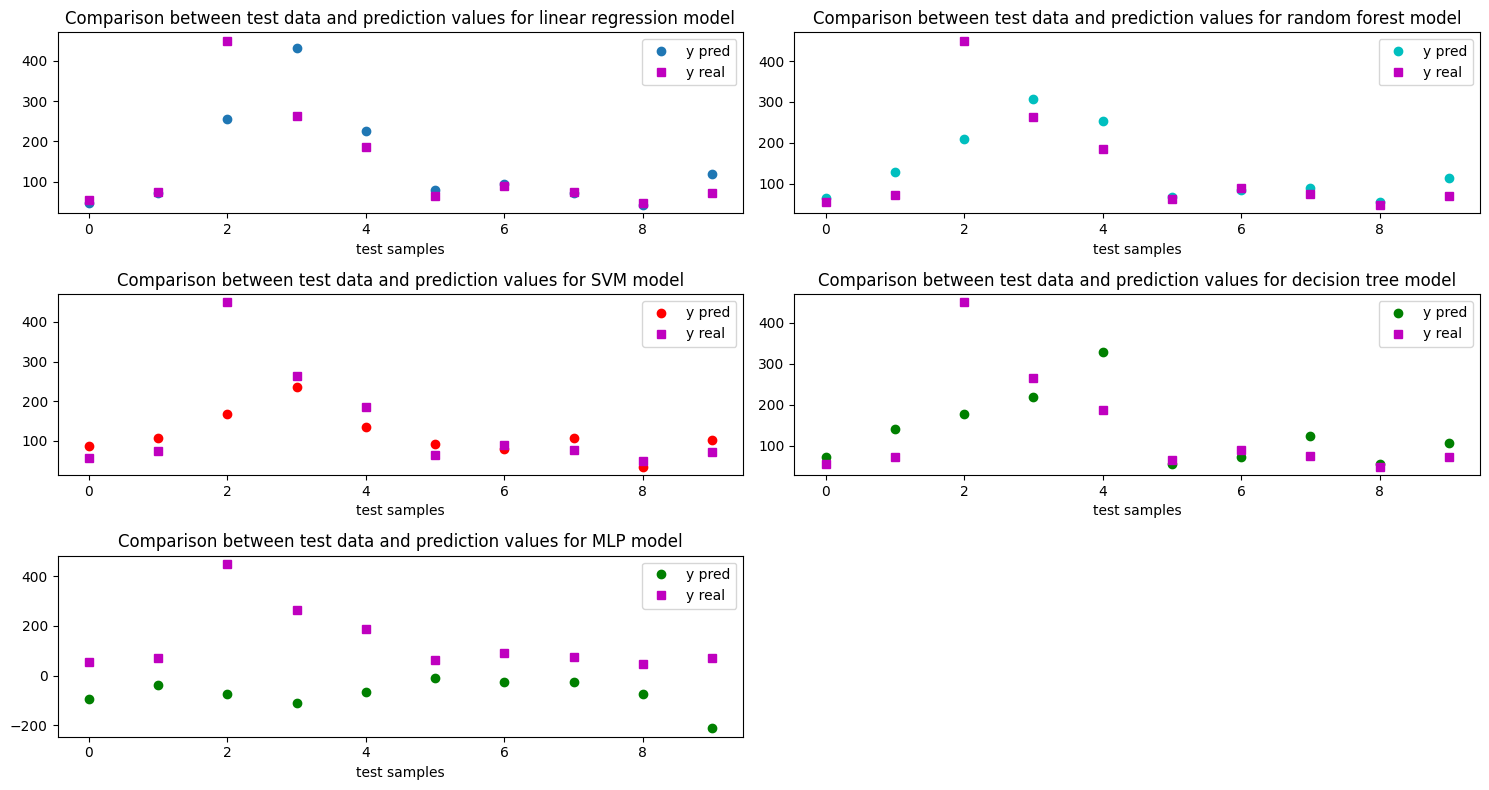

In [ ]:
# Create a figure with 2 rows and 2 columns
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 8))

num_te = 10
x_ = np.arange(0, num_te)

# First plot
axs[0, 0].plot(x_, y_pred_linear_regression[0:num_te], 'o', label='y pred')
axs[0, 0].plot(x_, y_test[0:num_te], 'ms', label='y real')
axs[0, 0].set_xlabel('test samples')
axs[0, 0].set_title('Comparison between test data and prediction values for linear regression model')
axs[0, 0].legend()

# Second plot
axs[0, 1].plot(x_, y_pred_randomforest[0:num_te], 'co', label='y pred')
axs[0, 1].plot(x_, y_test[0:num_te], 'ms', label='y real')
axs[0, 1].set_xlabel('test samples')
axs[0, 1].set_title('Comparison between test data and prediction values for random forest model')
axs[0, 1].legend()

# Third plot
axs[1, 0].plot(x_, y_pred_svm[0:num_te], 'ro', label='y pred')
axs[1, 0].plot(x_, y_test[0:num_te], 'ms', label='y real')
axs[1, 0].set_xlabel('test samples')
axs[1, 0].set_title('Comparison between test data and prediction values for SVM model')
axs[1, 0].legend()

# Fourth plot
axs[1, 1].plot(x_, y_pred_decisiontree[0:num_te], 'go', label='y pred')
axs[1, 1].plot(x_, y_test[0:num_te], 'ms', label='y real')
axs[1, 1].set_xlabel('test samples')
axs[1, 1].set_title('Comparison between test data and prediction values for decision tree model')
axs[1, 1].legend()

# Fifth plot
axs[2, 0].plot(x_, y_pred_mlp[0:num_te], 'go', label='y pred')
axs[2, 0].plot(x_, y_test[0:num_te], 'ms', label='y real')
axs[2, 0].set_xlabel('test samples')
axs[2, 0].set_title('Comparison between test data and prediction values for MLP model')
axs[2, 0].legend()

# Sixth plot (empty)
axs[2, 1].axis('off')

# Adjust the spacing between the subplots
plt.tight_layout()

# Display the plots
plt.show()

We can see that in the random forest model, the estimated values are in closer proximity to the actual values compared to the other models.


We can also see the prediction values of 20 samples for all models compared to the real value in the following plot.

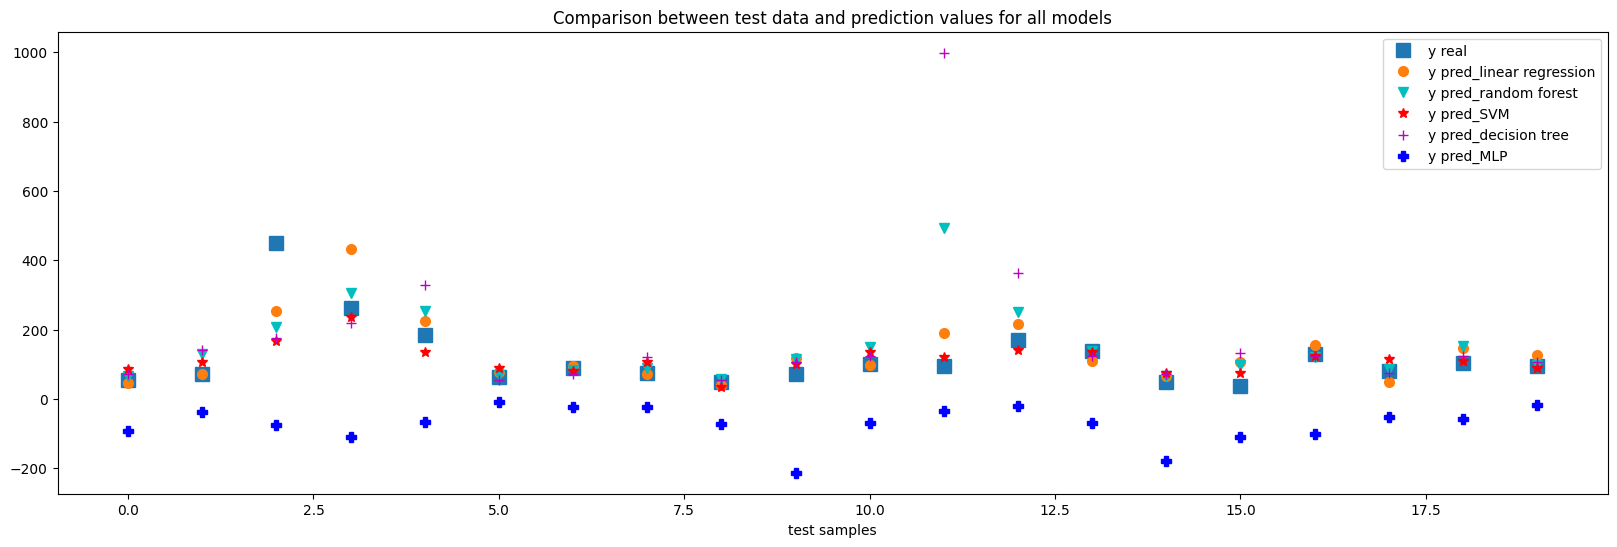

In [ ]:
plt.figure(figsize=(20, 6))

num_te = 20
x_ = np.arange(0, num_te)

# plot prediction values for all models with together
plt.plot(x_, y_test[0:num_te], 's',  markersize=10, label='y real')
plt.plot(x_, y_pred_linear_regression[0:num_te], 'o', markersize=7, label='y pred_linear regression')
plt.plot(x_, y_pred_randomforest[0:num_te], 'cv', markersize=7, label='y pred_random forest')
plt.plot(x_, y_pred_svm[0:num_te], 'r*', markersize=7, label='y pred_SVM')
plt.plot(x_, y_pred_decisiontree[0:num_te], 'm+', markersize=7, label='y pred_decision tree')
plt.plot(x_, y_pred_mlp[0:num_te], 'bP', markersize=7, label='y pred_MLP' )

plt.xlabel('test samples')
plt.title('Comparison between test data and prediction values for all models')
plt.legend()
# Display the plots
plt.show()

From the plot, you can also visually see that the Random Forest model has the highest prediction accuracy among all the models.

###Conclusion

After comparing their performance using Mean Squared Error and cross-validation, we selected random forest regression as the final model due to its superior performance in terms of accuracy and robustness to outliers.

The final random forest regression model included features such as the number of bedrooms, city, property type, ..., and was trained on 80% of the data and tested on the remaining 20%. The model achieved an MSE value of 11296.5279 and CV value of 14551.281 on the test set, indicating a good fit to the data.

Overall, the final model provides a coherent and manageable solution for predicting rental prices of short stay houses in Melbourne, based on a select set of relevant features.